In [5]:
import pandas as pd
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings("ignore")
from mpl_finance import candlestick_ohlc

In [6]:
taiex2013=pd.read_csv('taiex2013.csv',sep='\t')
taiex2013.head(n=3)

,Date,Open,High,Low,Close,Volume
0,2013-01-02,7738.05,7793.48,7715.26,7779.22,3416421
1,2013-01-03,7826.34,7855.16,7815.29,7836.84,4480963
2,2013-01-04,7818.27,7818.27,7773.06,7805.99,4172906


In [7]:
taiex2013.index = pd.to_datetime(taiex2013.Date)
type(taiex2013.index)
taiex201304 = taiex2013['2013-04'] 

In [8]:
from matplotlib.dates import date2num
from datetime import datetime

In [9]:
taiex201304.Date=[date2num(datetime.strptime(date,"%Y-%m-%d"))\
               for date in taiex201304.Date]
            
taiex201304.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2013-04-01,15796.0,7934.25,7937.73,7896.57,7899.24,2691053
2013-04-02,15797.0,7897.16,7924.46,7879.55,7913.18,2836215
2013-04-03,15798.0,7949.12,7954.15,7913.77,7942.35,3097976
2013-04-08,15803.0,7831.22,7843.10,7747.47,7752.79,3929740
2013-04-09,15804.0,7766.62,7781.13,7714.93,7728.54,3170515


In [10]:
type(taiex201304)

pandas.core.frame.DataFrame

In [11]:
taiex201304_listData=[]
for i in range(len(taiex201304)):
    a=[taiex201304.Date[i],\
    taiex201304.Open[i],taiex201304.High[i],\
    taiex201304.Low[i],taiex201304.Close[i]]
    taiex201304_listData.append(a)

In [13]:
taiex201304_listData

[[15796.0, 7934.25, 7937.73, 7896.57, 7899.24],
 [15797.0, 7897.16, 7924.46, 7879.55, 7913.18],
 [15798.0, 7949.12, 7954.15, 7913.77, 7942.35],
 [15803.0, 7831.22, 7843.1, 7747.47, 7752.79],
 [15804.0, 7766.62, 7781.13, 7714.93, 7728.54],
 [15805.0, 7772.95, 7772.95, 7739.99, 7752.8],
 [15806.0, 7788.58, 7857.98, 7788.58, 7857.98],
 [15807.0, 7861.12, 7864.86, 7810.54, 7821.63],
 [15810.0, 7815.32, 7835.12, 7753.24, 7763.53],
 [15811.0, 7690.91, 7801.05, 7688.62, 7801.05],
 [15812.0, 7822.81, 7822.81, 7791.53, 7809.07],
 [15813.0, 7781.48, 7826.13, 7757.33, 7791.35],
 [15814.0, 7868.9, 7933.72, 7862.92, 7930.8],
 [15817.0, 7976.1, 7996.55, 7950.01, 7970.38],
 [15818.0, 7955.92, 7968.79, 7913.6, 7942.77],
 [15819.0, 7977.4, 8025.45, 7968.28, 8023.71],
 [15820.0, 8015.38, 8026.46, 7994.19, 8021.75],
 [15821.0, 8034.47, 8081.37, 8020.47, 8022.06],
 [15824.0, 8043.71, 8046.22, 8014.27, 8029.74],
 [15825.0, 8065.92, 8115.59, 8065.92, 8093.66]]

In [14]:
import numpy as np
import mpl_finance
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY

In [15]:
from mpl_finance import candlestick_ohlc

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


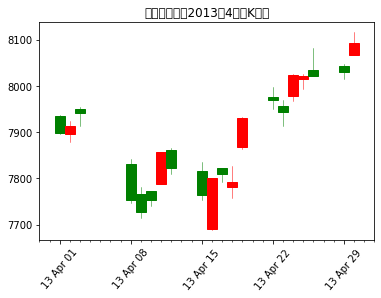

In [16]:
ax= plt.subplot()
mondays = WeekdayLocator(MONDAY)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(DayLocator() )
weekFormatter = DateFormatter('%y %b %d')
ax.xaxis.set_major_formatter(weekFormatter)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_title('加權股價指數2013年4月份K線圖')
candlestick_ohlc(ax,taiex201304_listData,width=1,
    colorup='r', colordown='g',alpha=1.0);
plt.setp(plt.gca().get_xticklabels(),
    rotation=50,
    horizontalalignment='center')
plt.show()

In [17]:
def candlePlot(seriesData,title='a'):   
    #設定日期格式
    Date=[date2num(date) for date in seriesData.index]
    seriesData.loc[:,'Date']=Date

    #將DataFrame數據轉換成List類型
    listData=[]
    for i in range(len(seriesData)):
        a=[seriesData.Date[i],\
        seriesData.Open[i],seriesData.High[i],\
        seriesData.Low[i],seriesData.Close[i]]
        listData.append(a)

    #設定繪圖相關參數
    ax = plt.subplot()
    mondays = WeekdayLocator(MONDAY)
    #日期格式為‘15-Mar-09’形式
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)

    #調用candlestick_ohlc函數
    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(title) #設定標題
    #設定x軸日期顯示角度
    plt.setp(plt.gca().get_xticklabels(), \
    rotation=50,horizontalalignment='center')
    return(plt.show())

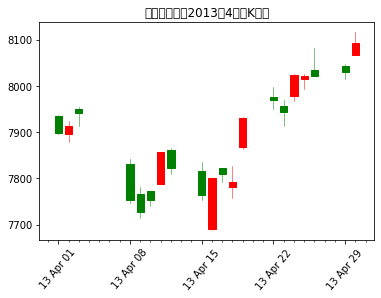

In [18]:
candlePlot(taiex201304,title='加權股價指數2013年4月份K線圖')

In [21]:
#morning star
taiex2011=pd.read_csv('taiex2011.csv',sep='\t')
taiex2011.index=pd.to_datetime(taiex2011.Date,
    format='%Y-%m-%d')

taiex2011.head(2)
taiex2011.iloc[-2:,:]

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2011-12-29,2011-12-29,7026.86,7074.82,6998.97,7074.82,2222251
2011-12-30,2011-12-30,7109.85,7139.03,7054.79,7072.08,2529183


In [23]:
Close=taiex2011.Close
Open=taiex2011.Open
ClOp=Close-Open
ClOp.head()
ClOp.describe()

count    247.000000
mean     -15.701093
std       76.099084
min     -259.050000
25%      -59.850000
50%      -10.350000
75%       35.325000
max      231.580000
dtype: float64

In [24]:
Shape = [0,0,0]
for i in range(3,len(ClOp)):
    print(ClOp[i-2],ClOp[i-1],ClOp[i],abs(ClOp[i-2]*0.5))
    if all([ClOp[i-2]<-20,abs(ClOp[i-1])< 20,\
    ClOp[i]>5,abs(ClOp[i])>abs(ClOp[i-2]*0.5)]):
        Shape.append(1)
    else:
        Shape.append(0)

Shape.index(1)
#print(Shape)

-47.92000000000007 -168.01000000000022 16.979999999999563 23.960000000000036
-168.01000000000022 16.979999999999563 -122.53000000000065 84.00500000000011
16.979999999999563 -122.53000000000065 19.829999999999927 8.489999999999782
-122.53000000000065 19.829999999999927 120.59000000000015 61.26500000000033
19.829999999999927 120.59000000000015 -27.01000000000022 9.914999999999964
120.59000000000015 -27.01000000000022 -58.590000000000146 60.29500000000007
-27.01000000000022 -58.590000000000146 -12.829999999999927 13.50500000000011
-58.590000000000146 -12.829999999999927 -73.79999999999927 29.295000000000073
-12.829999999999927 -73.79999999999927 98.15999999999985 6.414999999999964
-73.79999999999927 98.15999999999985 62.720000000001164 36.899999999999636
98.15999999999985 62.720000000001164 -37.6299999999992 49.07999999999993
62.720000000001164 -37.6299999999992 19.089999999998327 31.360000000000582
-37.6299999999992 19.089999999998327 -35.79999999999927 18.8149999999996
19.08999999999832

6

In [25]:
Doji=[0,0,0]
for i in range(3,len(Open)):
    if all([Open[i-1]<Open[i],Open[i-1]<Close[i-2],\
    Close[i-1]<Open[i],(Close[i-1]<Close[i-2])]):
        Doji.append(1)
    else:
        Doji.append(0)

Doji.count(1)

22

In [26]:
Trend=[0,0,0]
for i in range(3,len(Close)):
    if Close[i-2] < Close[i-3]:
        Trend.append(1)
    else:
        Trend.append(0)

In [27]:
StarSig=[]
for i in range(len(Trend)):
    if all([Shape[i]==1,Doji[i]==1,Trend[i]==1]):
        StarSig.append(1)
    else:
        StarSig.append(0)

for i in range(len(StarSig)):
    if StarSig[i]==1:
        print(taiex2011.index[i])

2011-04-20 00:00:00


In [28]:
taiex201104=taiex2011['2011-04']
print(taiex201104)

                  Date     Open     High      Low    Close   Volume
Date                                                               
2011-04-01  2011-04-01  8697.84  8705.13  8654.40  8705.13  3186692
2011-04-06  2011-04-06  8772.13  8860.02  8767.21  8851.98  4464196
2011-04-07  2011-04-07  8884.84  8901.72  8828.92  8901.72  4041900
2011-04-08  2011-04-08  8904.44  8929.06  8862.49  8894.54  4627855
2011-04-11  2011-04-11  8922.75  8922.75  8836.38  8880.27  3774171
2011-04-12  2011-04-12  8839.22  8839.22  8708.86  8732.59  3715733
2011-04-13  2011-04-13  8727.95  8780.20  8700.08  8780.20  3406888
2011-04-14  2011-04-14  8787.75  8835.39  8772.30  8802.73  3623194
2011-04-15  2011-04-15  8828.63  8834.07  8716.70  8718.12  3830377
2011-04-18  2011-04-18  8752.56  8764.65  8703.11  8714.48  3445887
2011-04-19  2011-04-19  8643.40  8658.97  8592.23  8638.55  3615303
2011-04-20  2011-04-20  8704.48  8813.28  8698.97  8813.28  4195397
2011-04-21  2011-04-21  8893.07  8992.08  8892.0

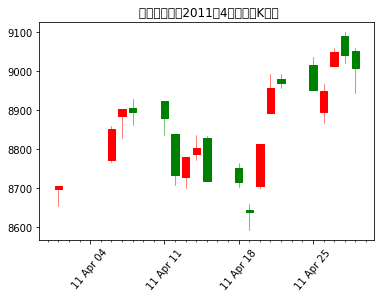

In [29]:
#找出黃昏之星
candlePlot(taiex201104 ,
    title=' 加權股價指數2011年4月份的日K线图')

In [30]:
# Dark Cloud Cover
import pandas as pd
taiex2013=pd.read_csv('taiex2013.csv',sep ='\t')

taiex2013.index=pd.to_datetime(taiex2013.Date,
    format='%Y-%m-%d')
Close13=taiex2013.Close
Open13=taiex2013.Open

In [31]:
Cloud=pd.Series(0,index=Close13.index)
for i in range(1,len(Close13)):
    if all([Close13[i]<Open13[i],\
            Close13[i-1]>Open13[i-1],\
            Open13[i]>Close13[i-1],\
            Close13[i]<0.5*(Close13[i-1]+Open13[i-1]),\
            Close13[i]>Open13[i-1]]):
        Cloud[i]=1

In [32]:
Trend=pd.Series(0,index=Close13.index)
for i in range(2,len(Close13)):
    if Close13[i-1]>Close13[i-2]>Close13[i-3]:
        Trend[i]=1

In [33]:
darkCloud=Cloud+Trend
darkCloud[darkCloud==2]

Date
2013-04-12    2
2013-10-21    2
dtype: int64

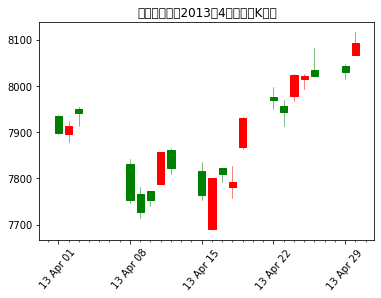

In [34]:
taiex201304=taiex2013['2013-04']           
candlePlot(taiex201304 ,\
                  title='加權股價指數2013年4月份的日K線圖')

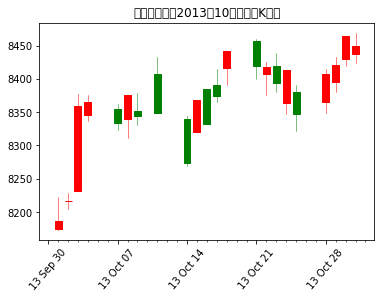

In [35]:
taiex201310=taiex2013['2013-10']
candlePlot(taiex201310,title='加權股價指數2013年10月份的日K線圖')